W2053240
Fathima Afra

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Display settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [3]:
# Load the data
data = pd.read_csv('/content/5DATA002W.2 Coursework Dataset(25012025v6.0) (2).csv')

In [4]:
# Display sample records
print("Sample records from the dataset:")
print(data.head(10))

Sample records from the dataset:
  Patient_ID  Month_of_Birth   Age     Sex    Occupation T_Stage N_Stage 6th_Stage             Differentiated  Grade   A_Stage  Tumor_Size  \
0      A0012              12  68.0  Female      Teaching      T1      N1       IIA      Poorly differentiated      3  Regional         4.0   
1      A0013              12  50.0  Female       Medical      T2      N2      IIIA  Moderately differentiated      2  Regional        35.0   
2      A0014              11  58.0  Female   Engineering      T3      N3      IIIC  Moderately differentiated      2  Regional        63.0   
3      A0015               3  58.0  Female    Technology      T1      N1       IIA      Poorly differentiated      3  Regional        18.0   
4      A0016               1  47.0  Female    Multimedia      T2      N1       IIB      Poorly differentiated      3  Regional        41.0   
5      A0017               2  51.0  Female      Research      T1      N1       IIA  Moderately differentiated      

In [5]:
# Display variable names
print("\nVariable names in the dataset:")
print(list(data.columns))



Variable names in the dataset:
['Patient_ID', 'Month_of_Birth', 'Age', 'Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Regional_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']


In [6]:
# Rename Regional_Node_Examined to Reginol_Node_Examined as in your code
data.rename(columns={
    'Regional_Node_Examined': 'Reginol_Node_Examined',
}, inplace=True)

In [7]:
print("\nVariable names in the dataset after renaming:")
print(list(data.columns))



Variable names in the dataset after renaming:
['Patient_ID', 'Month_of_Birth', 'Age', 'Sex', 'Occupation', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Reginol_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']


In [8]:
# Display data info
print("\nData types and non-null values in the dataset:")
data.info()


Data types and non-null values in the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Patient_ID             4024 non-null   object 
 1   Month_of_Birth         4024 non-null   int64  
 2   Age                    4015 non-null   float64
 3   Sex                    4020 non-null   object 
 4   Occupation             43 non-null     object 
 5   T_Stage                4024 non-null   object 
 6   N_Stage                4024 non-null   object 
 7   6th_Stage              4024 non-null   object 
 8   Differentiated         4024 non-null   object 
 9   Grade                  4024 non-null   int64  
 10  A_Stage                4024 non-null   object 
 11  Tumor_Size             4021 non-null   float64
 12  Estrogen_Status        4024 non-null   object 
 13  Progesterone_Status    4024 non-null   object 
 14  Reginol_

In [9]:

print("\nDimensions of the dataset (rows, columns):")
print(data.shape)


Dimensions of the dataset (rows, columns):
(4024, 18)


In [10]:
print("\nDescriptive statistics for numeric variables:")
print(data.describe())



Descriptive statistics for numeric variables:
       Month_of_Birth          Age        Grade   Tumor_Size  Reginol_Node_Examined  Reginol_Node_Positive  Survival_Months
count     4024.000000  4015.000000  4024.000000  4021.000000            4023.000000            4024.000000      4024.000000
mean         6.481362    54.107098     2.150596    30.419299              14.373602               4.158052        71.472167
std          3.475442    11.715528     0.638234    21.161080               8.129293               5.109331        25.361855
min          1.000000   -50.000000     1.000000   -75.000000               1.000000               1.000000         1.000000
25%          3.000000    47.000000     2.000000    16.000000               9.000000               1.000000        56.000000
50%          6.000000    54.000000     2.000000    25.000000              14.000000               2.000000        73.000000
75%         10.000000    61.000000     3.000000    38.000000              19.000000  

In [11]:

print("\nDescriptive statistics for categorical variables:")
print(data.describe(include='object'))



Descriptive statistics for categorical variables:
       Patient_ID     Sex    Occupation T_Stage N_Stage 6th_Stage             Differentiated   A_Stage Estrogen_Status Progesterone_Status  \
count        4024    4020            43    4024    4024      4024                       4024      4024            4024                4024   
unique       4024       2            40       4       3         5                          4         2               2                   2   
top         A4035  Female  House Person      T2      N1       IIA  Moderately differentiated  Regional        Positive            Positive   
freq            1    4001             2    1786    2732      1305                       2351      3932            3755                3326   

       Mortality_Status  
count              4024  
unique                7  
top               Alive  
freq               3399  


In [12]:
# Examine unique values of categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"\nUnique values for {col}:")
    print(data[col].unique())


Unique values for Patient_ID:
['A0012' 'A0013' 'A0014' ... 'A4033' 'A4034' 'A4035']

Unique values for Sex:
['Female' '1' nan]

Unique values for Occupation:
['Teaching' 'Medical' 'Engineering' 'Technology' 'Multimedia' 'Research'
 'House Person' 'Reporting' 'Development' 'Construction' 'Leisure'
 'Scoial work' 'Trading' 'Consultancy' 'Driving' 'Planning' 'Hospitality'
 'Travel' 'Agriculture' 'Manufacturing' 'Photography' 'Finance' 'Business'
 'Marketing' 'Training' 'Cleaning' 'Legal' 'Healthcare' 'Military' 'Sales'
 'Entertainment' 'Sports' 'Arts' 'Design' 'Maintenance' 'Management'
 'Human Resources' 'Administrative' 'Public' 'Politics' nan]

Unique values for T_Stage:
['T1' 'T2' 'T3' 'T4']

Unique values for N_Stage:
['N1' 'N2' 'N3']

Unique values for 6th_Stage:
['IIA' 'IIIA' 'IIIC' 'IIB' 'IIIB']

Unique values for Differentiated:
['Poorly differentiated' 'Moderately differentiated' 'Well differentiated'
 'Undifferentiated']

Unique values for A_Stage:
['Regional' 'Distant']

Uniq

In [13]:


# Check missing values
print("\nCount of missing values per variable:")
print(data.isnull().sum())


Count of missing values per variable:
Patient_ID                  0
Month_of_Birth              0
Age                         9
Sex                         4
Occupation               3981
T_Stage                     0
N_Stage                     0
6th_Stage                   0
Differentiated              0
Grade                       0
A_Stage                     0
Tumor_Size                  3
Estrogen_Status             0
Progesterone_Status         0
Reginol_Node_Examined       1
Reginol_Node_Positive       0
Survival_Months             0
Mortality_Status            0
dtype: int64


In [14]:
print("\nPercentage of missing values per variable:")
print(data.isna().sum()/len(data)*100)


Percentage of missing values per variable:
Patient_ID                0.000000
Month_of_Birth            0.000000
Age                       0.223658
Sex                       0.099404
Occupation               98.931412
T_Stage                   0.000000
N_Stage                   0.000000
6th_Stage                 0.000000
Differentiated            0.000000
Grade                     0.000000
A_Stage                   0.000000
Tumor_Size                0.074553
Estrogen_Status           0.000000
Progesterone_Status       0.000000
Reginol_Node_Examined     0.024851
Reginol_Node_Positive     0.000000
Survival_Months           0.000000
Mortality_Status          0.000000
dtype: float64


In [15]:
# Drop unnecessary columns
data_cleaned = data.drop(columns=['Month_of_Birth','Patient_ID', 'Sex', 'Occupation'])
print("\nShape after dropping unnecessary columns:", data_cleaned.shape)
print("\nRemaining columns:", list(data_cleaned.columns))


Shape after dropping unnecessary columns: (4024, 14)

Remaining columns: ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Reginol_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months', 'Mortality_Status']


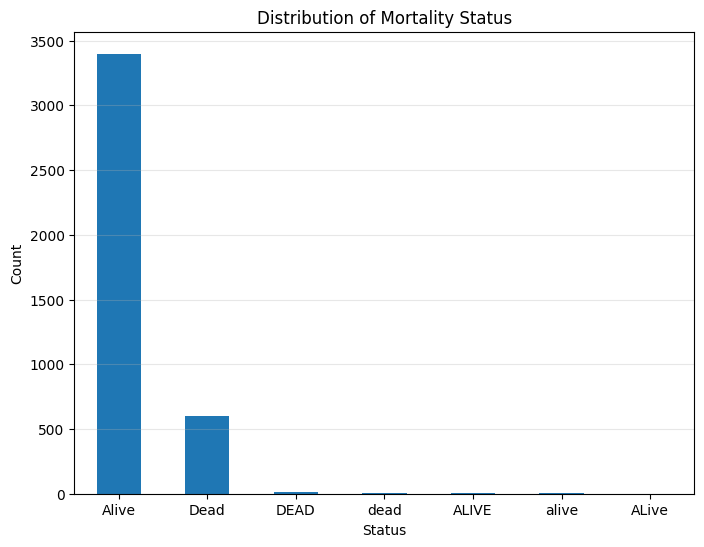

In [16]:

# Plot distribution of Mortality Status
plt.figure(figsize=(8, 6))
data_cleaned['Mortality_Status'].value_counts().plot(kind='bar')
plt.title('Distribution of Mortality Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.show()


In [17]:
# Numerical variables for analysis
numerical_vars = ['Age', 'Tumor_Size', 'Reginol_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']

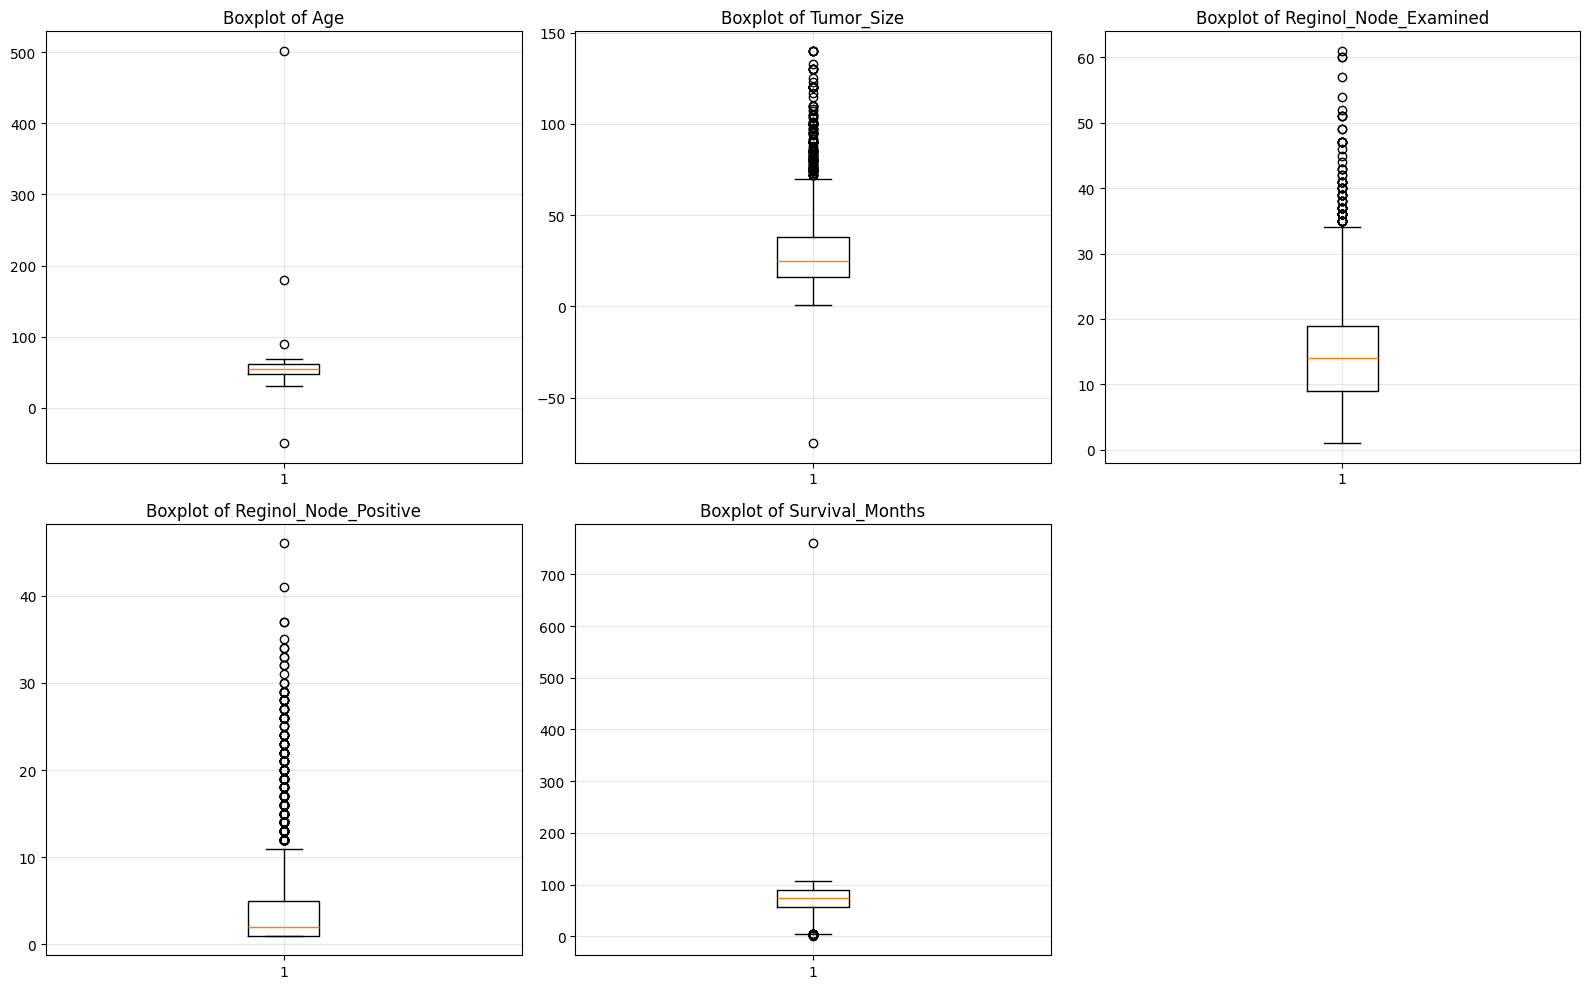

In [18]:

# Box plots for numerical variables
plt.figure(figsize=(16, 10))
for i, var in enumerate(numerical_vars):
    plt.subplot(2, 3, i+1)
    plt.boxplot(data_cleaned[var].dropna())
    plt.title(f'Boxplot of {var}')
    plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [19]:
# Function to find outliers using IQR method
def find_outliers_IQR(variable):
    q1 = variable.quantile(0.25)
    q3 = variable.quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = variable[(variable < lower_bound) | (variable > upper_bound)]
    print(outliers,lower_bound,upper_bound)
    return outliers, lower_bound, upper_bound


In [20]:

# Find outliers in numerical variables
for var in numerical_vars:
    outliers, lower_bound, upper_bound = find_outliers_IQR(data_cleaned[var])
    print(f"\nOutliers in {var}:")
    print(f"Number of outliers: {len(outliers)}")
    print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")
    if len(outliers) > 0:
        print("Sample of outliers:", outliers.head(5) if len(outliers) > 5 else outliers)

142    180.0
212    -50.0
522    502.0
842     89.0
Name: Age, dtype: float64 26.0 82.0

Outliers in Age:
Number of outliers: 4
Lower bound: 26.0, Upper bound: 82.0
Sample of outliers: 142    180.0
212    -50.0
522    502.0
842     89.0
Name: Age, dtype: float64
8       103.0
52      120.0
53       77.0
63       75.0
70      130.0
86      120.0
87       80.0
116      76.0
147      72.0
155     100.0
184     100.0
194      75.0
210     -75.0
215      85.0
219      75.0
220      72.0
238     120.0
254     110.0
276     105.0
277     100.0
289     140.0
305     130.0
316      80.0
318     100.0
322      80.0
337      90.0
362      80.0
367     100.0
371     108.0
376      98.0
379      90.0
401      90.0
426      75.0
441     120.0
447      80.0
476      74.0
480     100.0
483      80.0
525     100.0
526     130.0
540      87.0
564      80.0
585      81.0
593      80.0
602      80.0
630      80.0
691     100.0
705     117.0
713      76.0
740     140.0
769      90.0
828      80.0
874     1

In [21]:
# Define numerical features to check
numerical_features_to_check = ['Age', 'Grade', 'Tumor_Size',
                             'Reginol_Node_Examined', 'Reginol_Node_Positive', 'Survival_Months']

In [22]:
 # Print statistics before outlier handling
stats_before = data[numerical_features_to_check].describe()
print("Statistics before outlier handling:")
print(stats_before)

Statistics before outlier handling:
               Age        Grade   Tumor_Size  Reginol_Node_Examined  Reginol_Node_Positive  Survival_Months
count  4015.000000  4024.000000  4021.000000            4023.000000            4024.000000      4024.000000
mean     54.107098     2.150596    30.419299              14.373602               4.158052        71.472167
std      11.715528     0.638234    21.161080               8.129293               5.109331        25.361855
min     -50.000000     1.000000   -75.000000               1.000000               1.000000         1.000000
25%      47.000000     2.000000    16.000000               9.000000               1.000000        56.000000
50%      54.000000     2.000000    25.000000              14.000000               2.000000        73.000000
75%      61.000000     3.000000    38.000000              19.000000               5.000000        90.000000
max     502.000000     4.000000   140.000000              61.000000              46.000000       760

In [23]:
# Function to identify outliers using IQR method
def detect_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [24]:
# Handle outliers
# Age outliers - remove extreme outliers (-50 and 500)
data = data[(data['Age'] >= 0) & (data['Age'] <= 120)]

In [25]:
# Tumor Size outliers
Q1 = data['Tumor_Size'].quantile(0.25)
Q3 = data['Tumor_Size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['Tumor_Size'] = data['Tumor_Size'].clip(lower_bound, upper_bound)

In [26]:
# Handle Survival_Months outliers
print("\n---- Handling Survival_Months Outliers ----")
survival_outliers, survival_lower, survival_upper = detect_outliers_iqr(data, 'Survival_Months')
print(f"Survival_Months outliers detected: {len(survival_outliers)}")
print(f"IQR Boundaries - Lower: {survival_lower:.2f}, Upper: {survival_upper:.2f}")



---- Handling Survival_Months Outliers ----
Survival_Months outliers detected: 19
IQR Boundaries - Lower: 5.00, Upper: 141.00


In [27]:
# Handle survival months outliers using domain knowledge
print(f"Survival_Months range before handling: {data['Survival_Months'].min()} to {data['Survival_Months'].max()}")
data.loc[data['Survival_Months'] < 0, 'Survival_Months'] = 0  # Survival months can't be negative
data.loc[data['Survival_Months'] > 120, 'Survival_Months'] = 120  # Limit to 10 years (realistic follow-up period)
print(f"Survival_Months range after handling: {data['Survival_Months'].min()} to {data['Survival_Months'].max()}")

Survival_Months range before handling: 1 to 760
Survival_Months range after handling: 1 to 120


In [28]:
# Tumor Size outliers
Q1 = data['Tumor_Size'].quantile(0.25)
Q3 = data['Tumor_Size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['Tumor_Size'] = data['Tumor_Size'].clip(lower_bound, upper_bound)

In [29]:

Q1 = data['Tumor_Size'].quantile(0.25)
Q3 = data['Tumor_Size'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data['Tumor_Size'] = data['Tumor_Size'].clip(lower_bound, upper_bound)

In [30]:
# Handle Reginol_Node_Positive and Reginol_Node_Examined
# First, create a new feature combining these two
# Use a ratio: Positive nodes / Examined nodes
# Handle division by zero with np.where
data['Node_Positivity_Ratio'] = np.where(
    data['Reginol_Node_Examined'] > 0,
    data['Reginol_Node_Positive'] / data['Reginol_Node_Examined'],
    0  # If no nodes were examined, set ratio to 0
)

In [31]:
# Cap the ratio at 1.0 (it shouldn't exceed 1.0 logically as you can't have more positive nodes than examined)
data['Node_Positivity_Ratio'] = data['Node_Positivity_Ratio'].clip(0, 1.0)

In [32]:
# Now drop the original two columns
data = data.drop(columns=['Reginol_Node_Positive', 'Reginol_Node_Examined'])


In [33]:
# Update data_cleaned to match
data_cleaned = data.drop(columns=['Month_of_Birth','Patient_ID', 'Sex', 'Occupation'])

In [34]:

# Update numerical variables list for analysis
numerical_vars = ['Age', 'Tumor_Size', 'Node_Positivity_Ratio', 'Survival_Months','Grade']

In [35]:
# General function to cap outliers
def cap_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.clip(lower, upper)

In [36]:

# Count outliers
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return ((column < lower) | (column > upper)).sum()

for col in ['Age', 'Tumor_Size', 'Survival_Months', 'Node_Positivity_Ratio']:
    print(f"{col}: {count_outliers(data[col])} outliers")

Age: 1 outliers
Tumor_Size: 0 outliers
Survival_Months: 18 outliers
Node_Positivity_Ratio: 0 outliers


In [37]:
# Print statistics after outlier handling
stats_after = data[numerical_vars].describe()
print("\nStatistics after outlier handling:")
print(stats_after)



Statistics after outlier handling:
               Age   Tumor_Size  Node_Positivity_Ratio  Survival_Months        Grade
count  4012.000000  4009.000000            4012.000000      4012.000000  4012.000000
mean     53.990030    29.301322               0.325832        71.289133     2.150798
std       8.981901    17.739099               0.286658        22.931280     0.638218
min      30.000000   -17.000000               0.000000         1.000000     1.000000
25%      47.000000    16.000000               0.100000        56.000000     2.000000
50%      54.000000    25.000000               0.214286        73.000000     2.000000
75%      61.000000    38.000000               0.500000        90.000000     3.000000
max      89.000000    71.000000               1.000000       120.000000     4.000000


In [38]:
# Handle missing values
missing_columns = data_cleaned.columns[data_cleaned.isnull().any()].tolist()
print("\nColumns with missing values:", missing_columns)

for col in missing_columns:
    col_mean = data_cleaned[col].mean()
    data_cleaned[col].fillna(col_mean, inplace=True)
    print(f"Imputed missing values in {col} with mean: {col_mean}")

print("\nMissing values after imputation:")
print(data_cleaned.isnull().sum())


Columns with missing values: ['Tumor_Size']
Imputed missing values in Tumor_Size with mean: 29.301322025442754

Missing values after imputation:
Age                      0
T_Stage                  0
N_Stage                  0
6th_Stage                0
Differentiated           0
Grade                    0
A_Stage                  0
Tumor_Size               0
Estrogen_Status          0
Progesterone_Status      0
Survival_Months          0
Mortality_Status         0
Node_Positivity_Ratio    0
dtype: int64


In [39]:
# Encode Mortality Status
mortality_status_mapping = {'DEAD': 1, 'Dead': 1, 'DEAD ': 1, 'Alive': 0, 'ALIVE': 0, 'alive': 0}
data_cleaned['Mortality_Status'] = data_cleaned['Mortality_Status'].map(mortality_status_mapping)
print("\nMortality Status mapping completed:")
print(data_cleaned['Mortality_Status'].value_counts())


Mortality Status mapping completed:
Mortality_Status
0.0    3397
1.0     606
Name: count, dtype: int64


In [40]:
# Encode remaining categorical variables
print("\nStep 7: Encoding categorical variables")
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
print(f"Categorical columns: {list(categorical_cols)}")


Step 7: Encoding categorical variables
Categorical columns: ['T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'A_Stage', 'Estrogen_Status', 'Progesterone_Status']


In [41]:

column_mappings = {'Mortality Status': mortality_status_mapping}
# Label encoding for categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    unique_vals = data_cleaned[col].unique()
    data_cleaned[col] = le.fit_transform(data_cleaned[col])
    mapping = {original: encoded for original, encoded in zip(unique_vals, le.transform(unique_vals))}
    column_mappings[col] = mapping
    print(f"\nMapping for {col}:")
    print(mapping)



Mapping for T_Stage:
{'T1': np.int64(0), 'T2': np.int64(1), 'T3': np.int64(2), 'T4': np.int64(3)}

Mapping for N_Stage:
{'N1': np.int64(0), 'N2': np.int64(1), 'N3': np.int64(2)}

Mapping for 6th_Stage:
{'IIA': np.int64(0), 'IIIA': np.int64(2), 'IIIC': np.int64(4), 'IIB': np.int64(1), 'IIIB': np.int64(3)}

Mapping for Differentiated:
{'Poorly differentiated': np.int64(1), 'Moderately differentiated': np.int64(0), 'Well differentiated': np.int64(3), 'Undifferentiated': np.int64(2)}

Mapping for A_Stage:
{'Regional': np.int64(1), 'Distant': np.int64(0)}

Mapping for Estrogen_Status:
{'Positive': np.int64(1), 'Negative': np.int64(0)}

Mapping for Progesterone_Status:
{'Positive': np.int64(1), 'Negative': np.int64(0)}


In [42]:
# Prepare datasets for classification and regression
classification_data = data_cleaned.copy()
print("\nClassification dataset shape:", classification_data.shape)


Classification dataset shape: (4012, 13)


In [46]:
# Filter for regression dataset (only deceased patients)
mortality_status_numeric = 1
regression_data = data_cleaned[data_cleaned['Mortality_Status'] == mortality_status_numeric].copy()
# Drop the Mortality_Status column
regression_data.drop('Mortality_Status', axis=1, inplace=True)
print("\nRegression dataset shape:", regression_data.shape)


Regression dataset shape: (606, 12)


In [47]:
print("\nColumn names in regression dataset:", regression_data.columns.tolist())



Column names in regression dataset: ['Age', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status', 'Survival_Months', 'Node_Positivity_Ratio']


In [61]:

# FEATURE SCALING WITH STANDARDSCALER
# For classification dataset
features_to_scale = [col for col in classification_data.columns if col != 'Mortality_Status']
scaler_classification = StandardScaler()
classification_data[features_to_scale] = scaler_classification.fit_transform(classification_data[features_to_scale])

In [48]:
# For regression dataset
#  'Survival_Months' is the target variable for regression
regression_features = [col for col in regression_data.columns if col != 'Survival_Months']
regression_target = regression_data['Survival_Months']
scaler_regression = StandardScaler()
regression_data[regression_features] = scaler_regression.fit_transform(regression_data[regression_features])

In [49]:

# Save the processed datasets
classification_data.to_csv('classification_data_prepared.csv', index=False)
regression_data.to_csv('regression_data_prepared.csv', index=False)
print("\nDatasets have been saved successfully for classification and regression tasks.")


Datasets have been saved successfully for classification and regression tasks.


In [50]:
# Display final descriptive statistics
print("\nFinal descriptive statistics for classification dataset after scaling:")
print(classification_data.describe())



Final descriptive statistics for classification dataset after scaling:
               Age      T_Stage      N_Stage    6th_Stage  Differentiated        Grade      A_Stage   Tumor_Size  Estrogen_Status  \
count  4012.000000  4012.000000  4012.000000  4012.000000     4012.000000  4012.000000  4012.000000  4012.000000      4012.000000   
mean     53.990030     0.784397     0.437687     1.320788        0.690179     2.150798     0.977567    29.301322         0.932951   
std       8.981901     0.764864     0.692846     1.265556        1.016186     0.638218     0.148105    17.732464         0.250138   
min      30.000000     0.000000     0.000000     0.000000        0.000000     1.000000     0.000000   -17.000000         0.000000   
25%      47.000000     0.000000     0.000000     0.000000        0.000000     2.000000     1.000000    16.000000         1.000000   
50%      54.000000     1.000000     0.000000     1.000000        0.000000     2.000000     1.000000    25.000000         1.000000 

In [70]:

print("\nFinal descriptive statistics for regression dataset after scaling:")
print(regression_data.describe())


Final descriptive statistics for regression dataset after scaling:
                Age       T_Stage       N_Stage     6th_Stage  Differentiated         Grade       A_Stage    Tumor_Size  Estrogen_Status  \
count  6.060000e+02  6.060000e+02  6.060000e+02  6.060000e+02    6.060000e+02  6.060000e+02  6.060000e+02  6.060000e+02     6.060000e+02   
mean   2.051897e-17 -1.172513e-17 -2.931282e-17  2.931282e-18   -1.465641e-17  2.638154e-17  1.832051e-17 -1.758769e-17     2.931282e-17   
std    1.000826e+00  1.000826e+00  1.000826e+00  1.000826e+00    1.000826e+00  1.000826e+00  1.000826e+00  1.000826e+00     1.000826e+00   
min   -2.611234e+00 -1.269088e+00 -1.013313e+00 -1.457239e+00   -8.145449e-01 -2.224876e+00 -4.166970e+00 -1.788730e+00    -2.184360e+00   
25%   -7.490909e-01 -1.269088e+00 -1.013313e+00 -7.585943e-01   -8.145449e-01 -6.330520e-01  2.399825e-01 -7.875908e-01     4.578000e-01   
50%    1.819806e-01 -6.929498e-02  1.721458e-01 -5.994970e-02    4.414709e-01 -6.330520e-01 